<a href="https://colab.research.google.com/github/hamsiniR/Fraud-detection-Health-Insurance/blob/master/medicare_provider_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as profile   # To check data distributions and correlations
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


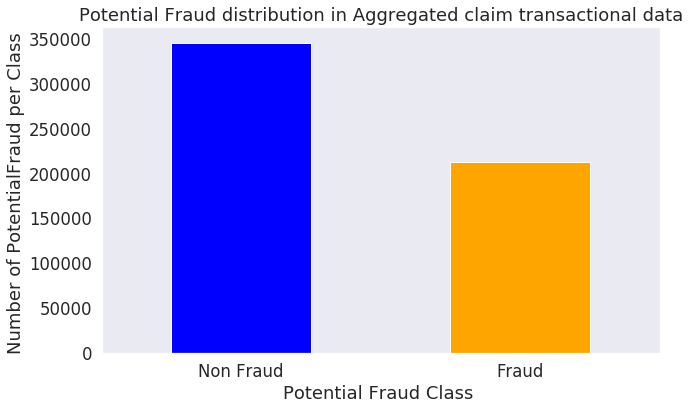

In [ ]:
#PLotting the frequencies of fraud and non-fraud Merged transactions in the data
data = pd.read_csv("/content/drive/My Drive/Final_year_Project/Datasets/Train_ProviderWithPatientDetailsdata.csv")
sns.set_style('dark',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(data['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(data))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6),color=['blue','orange'])

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')

Percent Distribution of Potential Fraud class:- 
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


Text(0, 0.5, 'Number of PotentialFraud per Class ')

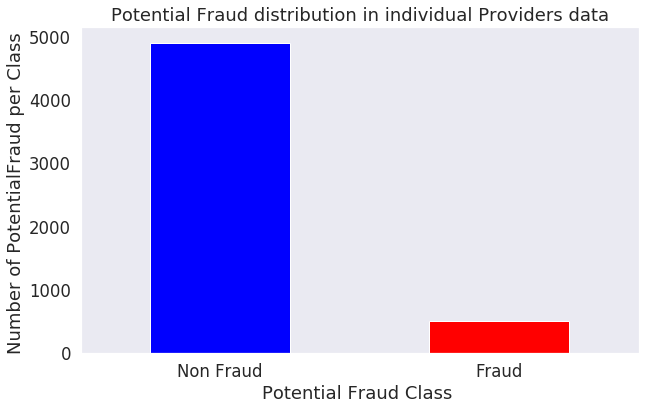

In [ ]:
#PLotting the frequencies of fraud and non-fraud transactions in the train data
Train = pd.read_csv("/content/drive/My Drive/Final_year_Project/Datasets/Train-1542865627584.csv")
count_classes_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes_provider*100/len(Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6),color=['blue','red'])

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in individual Providers data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

**Top-10 Procedures involved in Healthcare Fraud**

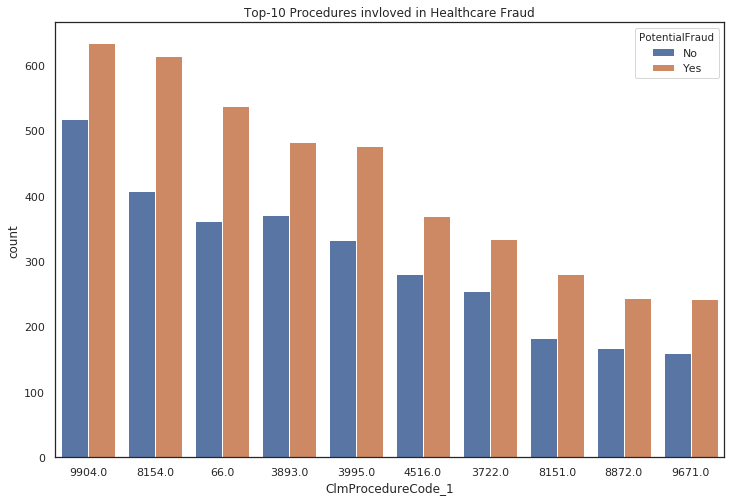

<Figure size 864x576 with 0 Axes>

In [ ]:
#plot countplot for each fraud non fraud categories

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=data
              ,order=data.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

From the above plot,we can say that diagnosis 4019,4011,2724 are top diagnosis (in terms of money involved).Distribution of fraud and non fraud counts shows suspicious transactions involved in them.

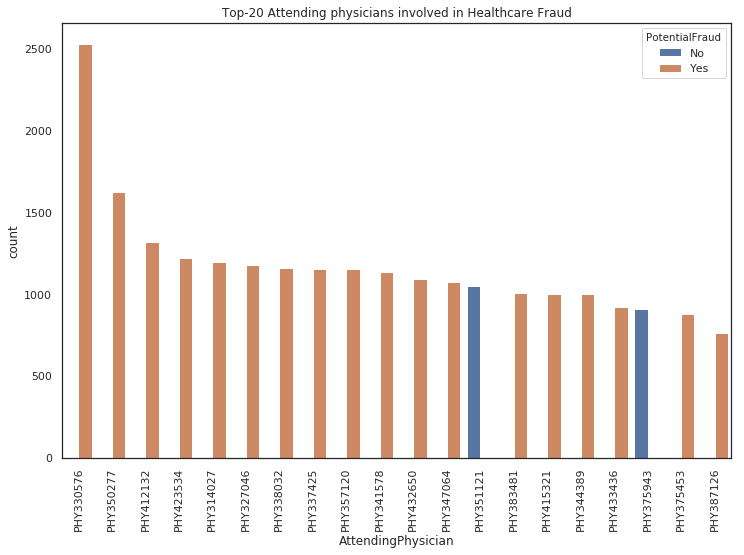

<Figure size 864x576 with 0 Axes>

In [ ]:
### lets plot Top-20 Attending Physicians involved in Healthcare Fraud 

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=data
              ,order=data.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top-20 Attending physicians involved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

Inference : In the above plot,we see count of involvement of attending physicians.And flags the nature of provider where they are working is whether fraud or non fraud.

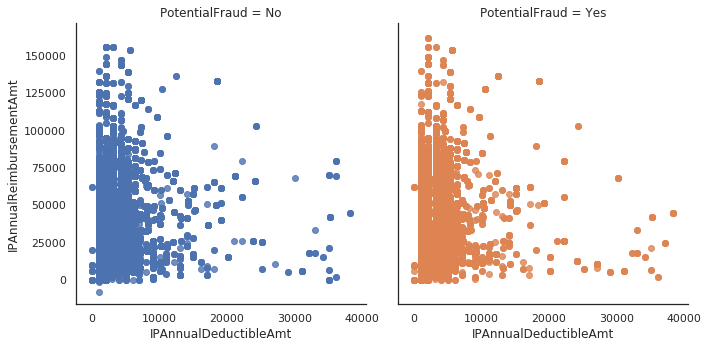

In [ ]:
#Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=data)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

No visible changes observed

DeductibleAmtPaid Vs InsClaimAmtReimbursed in Fraud and non Fraud Categories

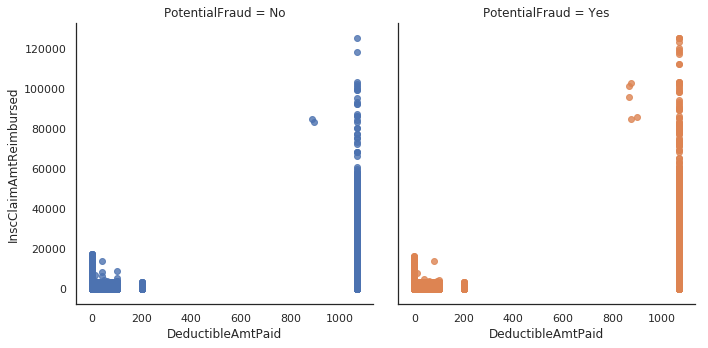

In [ ]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=data)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

Difficulty in differenciating between fraud and non fraud 

Now we will be checking the frauds between age and the Insurance claim Amount Reimbursed

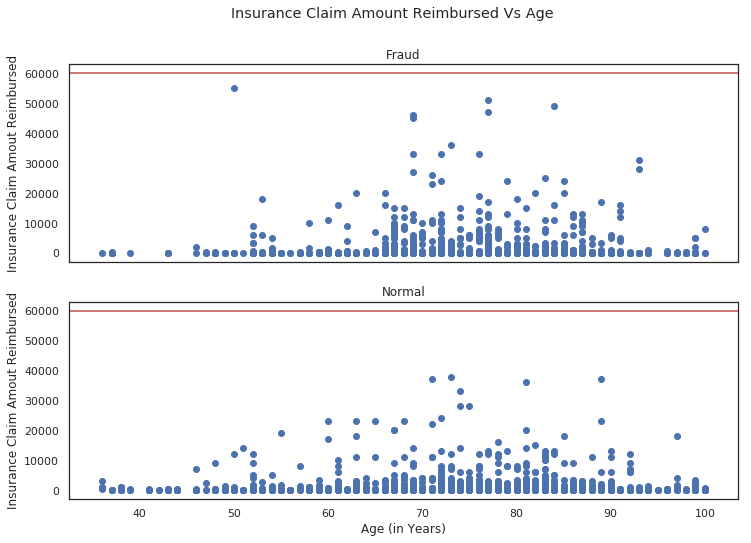

In [ ]:
## Let's See Insurance Claim Amount Reimbursed Vs Age
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(data[data.PotentialFraud=='Yes'].Age, 
            data[data.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(data[data.PotentialFraud=='No'].Age, 
            data[data.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

From the above graph,we see that occurance of fraud cases is more frequent in lower age groups(30-70 years) compared to higher age groups(70+ years).Age is one of the important feature for differentiating between fraud and non fraud behaviour.

**Feature Engineering**

Appending the train and test data improves the accuracy of the prediction model

In [ ]:
Train = pd.read_csv("/content/drive/My Drive/Final_year_Project/Datasets/Train_ProviderWithPatientDetailsdata.csv")
Test = pd.read_csv("/content/drive/My Drive/Final_year_Project/Datasets/Test_ProviderWithPatientDetailsdata.csv")

In [ ]:
Test_copy=Test
print('Shape of Test Copy :-',Test_copy.shape)

Shape of Test Copy :- (135392, 55)


In [ ]:
# we will use the columns of test to merge the dataset
col_merge=Test.columns
## Lets add both test and train datasets

Test_data=pd.concat([Test,Train[col_merge]])

In [ ]:
print("Shape of Test After Concatenation",Test_data.shape)

print("Expected rows after addition",135392+558211)


Shape of Test After Concatenation (693603, 55)
Expected rows after addition 693603


In [ ]:
Test_data.iloc[[135392]]

,Unnamed: 0,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,0,PRV51001,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1930-01-05,NaN,1,1,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,NaN,0.0


we can use certain methods to identify clues of fraud and abuse. One such simple method is 'Grouping based on Similarity'. In this method, we basically group all the records by the ProcedureCodes, DiagnosisCodes,Provider.

For example, if we have a dataset with Procedure codes only for X Procedure, we will then group and check average Amounts involved at each levels of Procedure and analyse the behaviour

Average features based on grouping variables .
1. Based on provider

In [ ]:
Train["PerProviderAvg_InscClaimAmtReimbursed"]=Train.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train["PerProviderAvg_DeductibleAmtPaid"]=Train.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train["PerProviderAvg_IPAnnualReimbursementAmt"]=Train.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerProviderAvg_IPAnnualDeductibleAmt"]=Train.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerProviderAvg_OPAnnualReimbursementAmt"]=Train.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerProviderAvg_OPAnnualDeductibleAmt"]=Train.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerProviderAvg_Age"]=Train.groupby('Provider')['Age'].transform('mean')
Train["PerProviderAvg_NoOfMonths_PartACov"]=Train.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train["PerProviderAvg_NoOfMonths_PartBCov"]=Train.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train["PerProviderAvg_AdmitForDays"]=Train.groupby('Provider')['AdmitForDays'].transform('mean')


In [ ]:
Test["PerProviderAvg_InscClaimAmtReimbursed"]=Test.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test["PerProviderAvg_DeductibleAmtPaid"]=Test.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test["PerProviderAvg_IPAnnualReimbursementAmt"]=Test.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerProviderAvg_IPAnnualDeductibleAmt"]=Test.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerProviderAvg_OPAnnualReimbursementAmt"]=Test.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerProviderAvg_OPAnnualDeductibleAmt"]=Test.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerProviderAvg_Age"]=Test.groupby('Provider')['Age'].transform('mean')
Test["PerProviderAvg_NoOfMonths_PartACov"]=Test.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test["PerProviderAvg_NoOfMonths_PartBCov"]=Test.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test["PerProviderAvg_AdmitForDays"]=Test.groupby('Provider')['AdmitForDays'].transform('mean')

In [ ]:
print('Train',Train.shape)
Train.iloc[:,-10:].head(2)

print("Test ",Test.shape)
Test.iloc[:,-10:].head(4)

Train (558211, 66)
Test  (135392, 65)


,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays
0,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,61.0,11.82439,12.0,NaN
1,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,61.0,11.82439,12.0,NaN
2,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,61.0,11.82439,12.0,NaN
3,262.390244,1.853659,5180.926829,548.253659,2345.073171,677.95122,61.0,11.82439,12.0,NaN


Based on BeneID

In [ ]:
## Grouping based on BeneID explains amounts involved per beneficiary.Reason to derive this feature is that one beneficiary 
## can go to multiple providers and can be involved in fraud cases
Train["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train["PerBeneIDAvg_DeductibleAmtPaid"]=Train.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerBeneIDAvg_AdmitForDays"]=Train.groupby('BeneID')['AdmitForDays'].transform('mean')

In [ ]:
Test["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test["PerBeneIDAvg_DeductibleAmtPaid"]=Test.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerBeneIDAvg_AdmitForDays"]=Test.groupby('BeneID')['AdmitForDays'].transform('mean')


3. Based on Physicians

In [ ]:

Train["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_AdmitForDays"]=Train.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

In [ ]:
Train["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_AdmitForDays"]=Train.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

Test["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Test["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerOtherPhysicianAvg_AdmitForDays"]=Test.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

4. Based on OperatingPhysicians

In [ ]:
Train["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_AdmitForDays"]=Train.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_AdmitForDays"]=Test.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

5. Based of AttendingPhysician

In [ ]:
Train["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_AdmitForDays"]=Train.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')


Test["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_AdmitForDays"]=Test.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

Diagonsis Group Code

In [ ]:
Train["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

Test["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

grouped by ClmAdmitDiagnosisCode

In [ ]:
Train["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

grouped by ClmProcedureCode_1

In [ ]:
Train["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

grouped by ClmProcedureCode_2

In [ ]:
Train["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

grouped by ClmProcedureCode_3

In [ ]:
Train["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

grouped by ClmDiagnosisCode_1

In [ ]:
Train["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

grouped by ClmDiagnosisCode_2

In [ ]:
Train["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

grouped by ClmDiagnosisCode_3

In [ ]:
Train["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

grouped by ClmDiagnosisCode_4

In [ ]:
Train["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

Claims are filed by Provider,so fraud can be organized crime.So we will check ClmCounts filed by Providers and when pairs like Provider +BeneID, Provider+Attending Physician, Provider+ClmAdmitDiagnosisCode, Provider+ClmProcedureCode_1,Provider+ClmDiagnosisCode_1 are together.

Average Feature based on grouping based on combinations of different variables.

In [ ]:
Train["ClmCount_Provider"]=Train.groupby(['Provider'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID"]=Train.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train["ClmCount_Provider_AttendingPhysician"]=Train.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_OtherPhysician"]=Train.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_OperatingPhysician"]=Train.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_1"]=Train.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_2"]=Train.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_3"]=Train.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_4"]=Train.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_5"]=Train.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_1"]=Train.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_2"]=Train.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_3"]=Train.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_4"]=Train.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_5"]=Train.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_6"]=Train.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_7"]=Train.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_8"]=Train.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_9"]=Train.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train["ClmCount_Provider_DiagnosisGroupCode"]=Train.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train["ClmCount_Provider_BeneID_AttendingPhysician"]=Train.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_OtherPhysician"]=Train.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_OperatingPhysician"]=Train.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


Test["ClmCount_Provider"]=Test.groupby(['Provider'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID"]=Test.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test["ClmCount_Provider_AttendingPhysician"]=Test.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_OtherPhysician"]=Test.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_OperatingPhysician"]=Test.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_1"]=Test.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_2"]=Test.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_3"]=Test.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_4"]=Test.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_5"]=Test.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_1"]=Test.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_2"]=Test.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_3"]=Test.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_4"]=Test.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_5"]=Test.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_6"]=Test.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_7"]=Test.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_8"]=Test.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_9"]=Test.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test["ClmCount_Provider_DiagnosisGroupCode"]=Test.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test["ClmCount_Provider_BeneID_AttendingPhysician"]=Test.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_OtherPhysician"]=Test.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_OperatingPhysician"]=Test.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [ ]:
print('Train_ProviderWithPatientDetailsdata shape-',Train.shape)
print('Test_ProviderWithPatientDetailsdata shape-',Test.shape)

Train_ProviderWithPatientDetailsdata shape- (558211, 185)
Test_ProviderWithPatientDetailsdata shape- (135392, 185)


In [ ]:
## Lets Check unique values of ICD Diagnosis Codes

diagnosiscode_2chars=Train['ClmDiagnosisCode_1'].astype(str).str[0:2]

diagnosiscode_2chars.unique()

array(['59', '78', 'V4', '29', '03', '51', 'na', '71', 'V1', '27', '42',
       'V7', '24', '41', '56', '79', '04', '35', '85', 'V5', '72', '44',
       '45', '18', '60', '50', '57', '40', '16', '25', '68', '15', '82',
       '28', '61', '47', '99', '20', '70', '33', '31', '49', '88', '48',
       '53', '43', '91', '55', '00', '58', '73', '46', '19', '17', 'V0',
       '34', 'V6', '62', 'V8', '11', '36', '83', 'E8', '02', '32', '52',
       '38', '23', '84', '37', 'V2', '87', '30', '90', '21', '12', '92',
       '39', '63', '69', '64', '81', '89', '95', '80', '22', '07', '06',
       '93', '94', '54', '26', '05', '13', '74', '14', '98', '08', '97',
       '75', '66', 'E9', '09', '96', '10', '77', '86', '65', '67', '01',
       '76'], dtype=object)

# DATA PREPROCESSING

In [ ]:
##### Lets impute numeric columns with 0

cols1 = Train.select_dtypes([np.number]).columns
cols2 = Train.select_dtypes(exclude = [np.number]).columns

Train[cols1] = Train[cols1].fillna(value=0)
Test[cols1]=Test[cols1].fillna(value=0)
print('Test_ProviderWithPatientDetailsdata shape:',Test.shape)

Test_ProviderWithPatientDetailsdata shape: (135392, 185)


feature selection

In [ ]:
# Lets remove unnecessary columns ,as we grouped based on these columns and derived maximum infromation from them.

cols=Train.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD']

Train_category_removed=Train.drop(axis=1,columns=remove_these_columns)
Test_category_removed=Test.drop(axis=1,columns=remove_these_columns)


In [ ]:
Train_category_removed.Gender=Train_category_removed.Gender.astype('category')
Test_category_removed.Gender=Test_category_removed.Gender.astype('category')



In [ ]:
Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender'],drop_first=True)
Test_category_removed=pd.get_dummies(Test_category_removed,columns=['Gender'],drop_first=True)

In [ ]:
Train_category_removed.head().T
Test_category_removed.iloc[135391:135393]

,Unnamed: 0,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,...,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Provider_ClmProcedureCode_2,ClmCount_Provider_ClmProcedureCode_3,ClmCount_Provider_ClmProcedureCode_4,ClmCount_Provider_ClmProcedureCode_5,ClmCount_Provider_ClmDiagnosisCode_1,ClmCount_Provider_ClmDiagnosisCode_2,ClmCount_Provider_ClmDiagnosisCode_3,ClmCount_Provider_ClmDiagnosisCode_4,ClmCount_Provider_ClmDiagnosisCode_5,ClmCount_Provider_ClmDiagnosisCode_6,ClmCount_Provider_ClmDiagnosisCode_7,ClmCount_Provider_ClmDiagnosisCode_8,ClmCount_Provider_ClmDiagnosisCode_9,ClmCount_Provider_DiagnosisGroupCode,ClmCount_Provider_BeneID_AttendingPhysician,ClmCount_Provider_BeneID_OtherPhysician,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2
135391,135391,PRV57750,200,0.0,0.0,0,12,12,0,1,0,0,1,0,0,1,0,0,0,0,0,290,1120,0.0,0.0,257.333333,2.190476,3389.428571,376.342857,2473.714286,612.952381,0.0,11.771429,11.885714,0.0,110.0,0.0,0,0,290,...,2677.727273,580.909091,4.1875,2951.221719,300.835616,8145.022624,996.361991,2048.41629,581.674208,7.214286,105,1,62.0,22.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


In [ ]:
Train_category_removed.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_category_removed.head()
Train_category_removed.PotentialFraud=Train_category_removed.PotentialFraud.astype('int64')
Train_category_removed.PotentialFraud.dtypes
Train_category_removed.PotentialFraud.min()

0

In [ ]:
Train_category_removed.PotentialFraud.max()

1

In [ ]:
print('Test Shape before removing',Test_category_removed.shape)

Test Shape before removing (135392, 156)


In [ ]:
Test_category_removed=Test_category_removed.iloc[:135392]

In [ ]:
Test_category_removed.tail()  

,Unnamed: 0,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,...,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Provider_ClmProcedureCode_2,ClmCount_Provider_ClmProcedureCode_3,ClmCount_Provider_ClmProcedureCode_4,ClmCount_Provider_ClmProcedureCode_5,ClmCount_Provider_ClmDiagnosisCode_1,ClmCount_Provider_ClmDiagnosisCode_2,ClmCount_Provider_ClmDiagnosisCode_3,ClmCount_Provider_ClmDiagnosisCode_4,ClmCount_Provider_ClmDiagnosisCode_5,ClmCount_Provider_ClmDiagnosisCode_6,ClmCount_Provider_ClmDiagnosisCode_7,ClmCount_Provider_ClmDiagnosisCode_8,ClmCount_Provider_ClmDiagnosisCode_9,ClmCount_Provider_DiagnosisGroupCode,ClmCount_Provider_BeneID_AttendingPhysician,ClmCount_Provider_BeneID_OtherPhysician,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2
135387,135387,PRV57750,1300,0.0,0.0,0,12,12,0,1,0,0,0,1,1,1,0,0,0,0,0,2300,60,0.0,0.0,257.333333,2.190476,3389.428571,376.342857,2473.714286,612.952381,0.0,11.771429,11.885714,0.0,620.0,0.0,0,0,2300,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,105,1,62.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
135388,135388,PRV57750,10,0.0,0.0,0,12,12,0,0,0,0,0,1,0,1,0,0,0,0,0,2970,760,0.0,0.0,257.333333,2.190476,3389.428571,376.342857,2473.714286,612.952381,0.0,11.771429,11.885714,0.0,505.0,0.0,0,0,2970,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,105,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
135389,135389,PRV57750,200,0.0,0.0,0,12,12,0,0,0,0,0,1,0,1,0,0,0,0,0,200,60,0.0,0.0,257.333333,2.190476,3389.428571,376.342857,2473.714286,612.952381,0.0,11.771429,11.885714,0.0,200.0,0.0,0,0,200,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,105,1,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
135390,135390,PRV57750,2300,0.0,0.0,0,12,12,1,0,1,0,1,0,1,1,0,0,0,0,0,5640,830,0.0,0.0,257.333333,2.190476,3389.428571,376.342857,

In [ ]:
Train_main_data = Train_category_removed.to_csv("/content/drive/My Drive/Final_year_Project/Datasets/Train_ProviderWithPatientDetailsMain.csv")
Test_main_data = Test_category_removed.to_csv("/content/drive/My Drive/Final_year_Project/Datasets/Test_main_data.csv")